<a href="https://colab.research.google.com/github/Joseph-Maulin/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/LS_DS_132_Intermediate_Linear_Algebra_Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. A review of statistical terms

### 1.1 Variance & Standard Deviation
Suppose we have a list of widgets. What is the mean, variance, and standard deviation of this list?

In [0]:
# here's the list.

widgets = [451,330,570,390,410]

In [0]:
# which libraries should we import here?
import numpy as np
import pandas as pd
import math

In [7]:
# find the mean
total = sum(widgets)
mean_widgets = total/len(widgets)
mean_widgets

430.2

#### Variance

In [0]:
# first write a little function 
subtract_mean = lambda x:x-mean_widgets
# Note: this can be converted to lambda for efficiency:

In [9]:
# use `map` to apply that function to our list 
distances = list(map(subtract_mean, widgets))
distances

[20.80000000000001,
 -100.19999999999999,
 139.8,
 -40.19999999999999,
 -20.19999999999999]

In [10]:
# square and sum all of those distances
squared_distances = list(map(lambda x: x**2, distances))
squared_distances

[432.6400000000005,
 10040.039999999997,
 19544.040000000005,
 1616.039999999999,
 408.03999999999957]

In [0]:
# how long is our list?
# for a sample taken from a population
list_length_S = len(squared_distances)-1
# for a whole population (no sample)
list_length_P = len(squared_distances)

In [12]:
# calculate variance
variance_widgets = sum(squared_distances)/list_length_P
variance_widgets

6408.160000000001

#### standard dev

In [13]:
# calculate the standard deviation
widgets_std = math.sqrt(variance_widgets)
widgets_std

80.05098375410512

In [14]:
np.sqrt(variance_widgets)

80.05098375410512

In [15]:
# check our work using numpy
print(np.mean(widgets))
print(np.var(widgets))
print(np.std(widgets))

430.2
6408.160000000001
80.05098375410512


In [16]:
# check our work using pandas
widgets_df = pd.DataFrame({"widgets":widgets})
print('mean: ', widgets_df['widgets'].mean())

mean:  430.2


In [17]:
# for a population
print(widgets_df['widgets'].var(ddof=0))
print(widgets_df['widgets'].std(ddof=0))

6408.160000000001
80.05098375410512


In [18]:
# for a sample
print(widgets_df['widgets'].var()) #ddof=1 which is the default assuming sample
print(widgets_df['widgets'].std())

8010.200000000001
89.49972066995517


### 1.2 Covariance
Find the covariance between widgets and gadgets.

In [0]:
# make a new list
gadgets = [410,505,371,220,625]

In [20]:
# using numpy
np.cov(widgets, gadgets)

array([[ 8010.2 , -2919.05],
       [-2919.05, 22889.7 ]])

In [35]:
# using pandas
widgets_df['gadgets'] = pd.Series(gadgets)
widgets_df

,widgets,gadgets
0,451,410
1,330,505
2,570,371
3,390,220
4,410,625


In [36]:
widgets_df.cov()

,widgets,gadgets
widgets,8010.20,-2919.05
gadgets,-2919.05,22889.70


### 1.3 Correlation Coefficient 
Find the correlation coefficient that summarizes the relationship between widgets and gadgets. 

In [0]:
# Calculate the standard dev of both lists using pandas.
std_w = widgets_df['widgets'].std(ddof=1)
std_g = widgets_df['gadgets'].std(ddof=1)

In [45]:
# Calculate covariance using pandas
# r=cov(X,Y)/σXσY
cov_wg = widgets_df['widgets'].cov(widgets_df['gadgets'])
cov_wg

-2919.0499999999997

In [0]:
# Calculate the denominator
denom = std_w * std_g

In [48]:
# Calculate correlation
corr_wg = cov_wg/denom
corr_wg

-0.2155756994093693

In [49]:
## Check work using pandas
widgets_df['widgets'].corr(widgets_df['gadgets'])

-0.21557569940936924

In [50]:
# A shorter way to do this
widgets_df.corr()

,widgets,gadgets
widgets,1.000000,-0.215576
gadgets,-0.215576,1.000000


### 1.4 The Variance-Covariance Matrix
Import a dataset of residential properties in Washington DC. Calculate the variance-covariance matrix and correlation matrix for the dataset's numeric columns.

In [0]:
# source: https://www.kaggle.com/christophercorrea/dc-residential-properties/
url = 'https://raw.githubusercontent.com/austinlasseter/dash-scatterplot-housing/master/dchouses.csv'


In [52]:
houses = pd.read_csv(url)
houses.head()

,BATHRM,HF_BATHRM,KITCHENS,HEAT,AC,ROOMS,PRICE
0,1,1,1.0,Forced Air,Y,6,NaN
1,2,1,1.0,Hot Water Rad,Y,8,460000.0
2,1,0,1.0,Hot Water Rad,N,6,NaN
3,1,0,1.0,Hot Water Rad,N,6,NaN
4,3,1,1.0,Warm Cool,Y,7,410220.0


In [54]:
houses['AC'] = houses['AC'].map({"Y":1, "N":0})
houses.head()

,BATHRM,HF_BATHRM,KITCHENS,HEAT,AC,ROOMS,PRICE
0,1,1,1.0,Forced Air,1,6,NaN
1,2,1,1.0,Hot Water Rad,1,8,460000.0
2,1,0,1.0,Hot Water Rad,0,6,NaN
3,1,0,1.0,Hot Water Rad,0,6,NaN
4,3,1,1.0,Warm Cool,1,7,410220.0


In [58]:
# calculate the covariance for the entire dataset
houses.cov()

,BATHRM,HF_BATHRM,KITCHENS,AC,ROOMS,PRICE
BATHRM,1.007166,0.125448,0.329582,0.056779,1.866127e+00,-5.164766e+05
HF_BATHRM,0.125448,0.340972,-0.067744,0.034268,4.989159e-01,4.109166e+05
KITCHENS,0.329582,-0.067744,0.420696,-0.048758,9.291807e-01,-6.497264e+03
AC,0.056779,0.034268,-0.048758,0.217093,-2.686306e-01,2.896332e+05
ROOMS,1.866127,0.498916,0.929181,-0.268631,7.218137e+00,-3.030853e+06
PRICE,-516476.554036,410916.625989,-6497.264022,289633.155131,-3.030853e+06,1.551202e+14


In [56]:
# calculate the correlation for the entire dataset
houses.corr()

,BATHRM,HF_BATHRM,KITCHENS,AC,ROOMS,PRICE
BATHRM,1.000000,0.214070,0.461896,0.121426,0.692115,-0.042109
HF_BATHRM,0.214070,1.000000,-0.173102,0.125953,0.318021,0.058728
KITCHENS,0.461896,-0.173102,1.000000,-0.151596,0.592760,-0.021364
AC,0.121426,0.125953,-0.151596,1.000000,-0.214595,0.056886
ROOMS,0.692115,0.318021,0.592760,-0.214595,1.000000,-0.088273
PRICE,-0.042109,0.058728,-0.021364,0.056886,-0.088273,1.000000


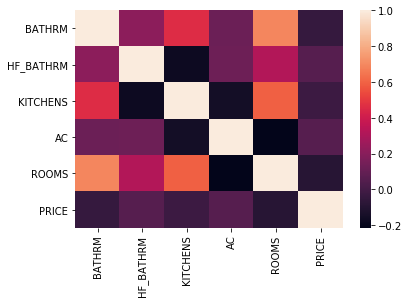

In [57]:
import seaborn as sns

sns.heatmap(houses.corr());


## 2. Orthogonality

### 2.1 Quick review of norm and dot product.

In [59]:
# let's make a couple of vectors.
v = np.random.randint(low=1, high=100, size=3)
x = np.random.randint(low=1, high=100, size=3)

print(v, "\n", x)

[78 46 33] 
 [74 36 64]


In [65]:
# quick: which one is longer? 
for vector in [v,x]:
  print(np.linalg.norm(vector))

96.37945839233586
104.24970023937719


In [66]:
# what's the dot product of x and v? using array broadcasting
(v[0]*x[0]) + (v[1]*x[1]) + (v[2]*x[2])

9540

In [67]:
# what's the dot product of x and v? using numpy
np.dot(v,x)

9540

In [68]:
# there's another way to write this.
x.dot(v)

9540

### 2.2 Orthogonality

In [0]:
# import

In [0]:
# choose some vectors
v1 = np.array([5,2])
v2 = np.array([1,-1])

Are the following vectors orthogonal?

In [83]:
# If dot product != 0, then vectors are not orthogonal.
np.dot(v1, v2)

3

In [73]:
# If dot product = 0, then vectors are orthogonal.
v1 = np.array([2,2])
v2 = np.array([1,-1])
np.dot(v1, v2)

0

In [74]:
# For any vector, generate another vector that is orthogonal to it.
k = np.random.randint(low=1, high=100, size=3)
k

array([76, 82, 56])

In [78]:
x = np.random.randint(low=1, high=100, size=3)
x

array([92, 28, 76])

In [80]:
x = x - x.dot(k) * k/np.linalg.norm(k)**2
x

array([ 26.1683295 , -43.02890765,  27.49245331])

In [81]:
np.dot(x,k)

-9.094947017729282e-13

## 3. Unit Vectors

In [84]:
# Suppose we have a vector f.
f = np.random.randint(low=1, high=100, size=5)
f

array([83, 14, 34, 34, 50])

In [88]:
# how long is it?
norm_f = np.linalg.norm(f)
norm_f

109.07336980216573

In [89]:
# find its unit vector. the hat symbol (f^) indicates it's a unit vector.
f_hat = f/norm_f
f_hat

array([0.76095568, 0.12835397, 0.31171678, 0.31171678, 0.45840703])

In [90]:
# how long is this?
f_hat_norm = np.linalg.norm(f_hat)
f_hat_norm

1.0

## 4. Linear Independence / Dependence 

Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [0]:
# Linearly dependent vectors scaled version of same vector
v1 = [-.8,1.3]
v2 = np.multiply(v1, 2)

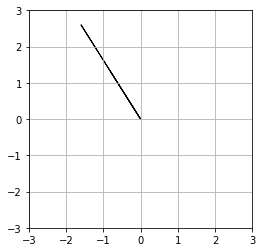

In [93]:
# Plot the vectors

fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-3,3)          
plt.ylim(-3,3)

plt.arrow(0,0,*v1)
plt.arrow(0,0,*v2)


In [0]:
# Linearly independent vectors, not orthogonal

In [0]:
# Set up the grid
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-3,3)          
plt.ylim(-3,3)

# Plot the vectors

## 5. Span

In [0]:
Suppose we have two vectors. The linear combination is as follows, where a and b are any scalars.

\begin{align}
a\begin{bmatrix} 1 & 3 \end{bmatrix} +
b\begin{bmatrix} 2 & 1 \end{bmatrix}
\end{align}

Note that:
* The set of all possible linear combinations (i.e., all possible values of a and b) is the span of these vectors. 
* A set of vectors _spans_ a space if their linear combinations fill the space.
* The span of most pairs of 2D vectors is the entire infinite sheet of infinite space (unless they are colinear). 

In [0]:
# Let's take two vectors.
v1 = np.array([1,3])
v2 = np.array([2,1])

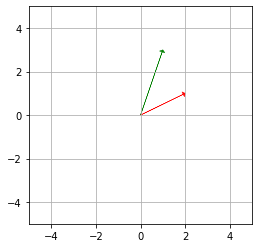

In [95]:
# Plot them on a grid
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-5,5)          
plt.ylim(-5,5)

plt.arrow(0,0,*v1,head_width=.25, head_length=.1, linewidth=.5, length_includes_head=True, color='g')
plt.arrow(0,0,*v2,head_width=.25, head_length=.1, linewidth=.5, length_includes_head=True, color='r')

# Display

In [96]:
# This is one possible linear combination:
a,b=(2,3)
linear_combo = np.multiply(v1, a) + np.multiply(v2,b)
linear_combo

array([8, 9])

In [0]:
# This is a set of several linear combinations:
muchos_combos=[]
for(a,b) in [(2,3), ]

## 6. Basis

In 2-dimensional space $\mathbb{R}^2$, ANY vector (a,b) can be decomposed as the linear combination of the basis vectors (1,0) and (0,1). Since these are unit vectors, they are called "orthonormal basis".

(a,b) = a(1,0) + b(0,1)

In [0]:
# find basis vectors in 2-d
vector_1 = [-2, 2]
vector_2 = [2, 2]

# Plot the Scaled Vectors

## 7. Rank

In [0]:
# Rank two
P = np.array([[1,0,1],
             [-2,-3,1],
              [3,3,0]])

In [105]:
np.linalg.matrix_rank(P)

2

In [106]:
# Return a 2-D array with ones on the diagonal and zeros elsewhere.
# identity matrix
np.eye(2)

array([[1., 0.],
       [0., 1.]])

In [107]:
np.linalg.matrix_rank(np.eye(2))

2

In [0]:
# rank three
P = np.array([[1,2,3],
             [-1,0,7],
             [4,8,2]])

In [109]:
np.linalg.matrix_rank(P)

3

In [0]:
# rank four


In [0]:
# rank four

In [110]:
# Rank zero
np.eye(0)

array([], shape=(0, 0), dtype=float64)

In [111]:
# Rank one
np.eye(1)

array([[1.]])

In [112]:
# Rank one
np.linalg.matrix_rank(np.array([1,2,3]))

1

## 8. Linear Projections

Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 

In [0]:
# Original Vector

In [0]:
# dot product

In [0]:
# projection

In [0]:
# Get Vals for L

In [0]:
# Axis Bounds
plt.xlim(-2,4)          
plt.ylim(-2,4)

# Set axes
axes = plt.gca()
plt.axes().set_aspect('equal')

# Plot Vectors and L